# Exercise-1

## 1.1 Data Exploration

### Q1.1.1

In [1]:
import pandas as pd

DATA_PATH = "dataset/WineQT.csv"

df = pd.read_csv(DATA_PATH)

df.head() # display the first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2]:
df.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df.describe() # summary of each numerical attribute

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
df = df.drop(columns=["Id"]) # dropping ID column to avoid meaningless patterns that could hurt the analysis

### Q1.1.2 


In [5]:
stats = df.describe()
stats.loc['std'].sort_values(ascending=False)

total sulfur dioxide    32.782130
free sulfur dioxide     10.250486
fixed acidity            1.747595
residual sugar           1.355917
alcohol                  1.082196
quality                  0.805824
citric acid              0.196686
volatile acidity         0.179633
sulphates                0.170399
pH                       0.156664
chlorides                0.047267
density                  0.001925
Name: std, dtype: float64

We can se that *"total sulfur dioxide"* and *"free sulfur dioxide"* have the highest variation in the dataset. This indicates that sulfur content varies a lot between the tests. Features like *chlorides* and *density*, on the other hand, have low variation, which suggests that the values for these features are more stable.

---

## 1.2 Correlation Analysis

### Q1.2.1

In [6]:
# corralation matrix for all values
corr_matrix = df.corr()

corr_matrix # show the matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


### Q1.2.2

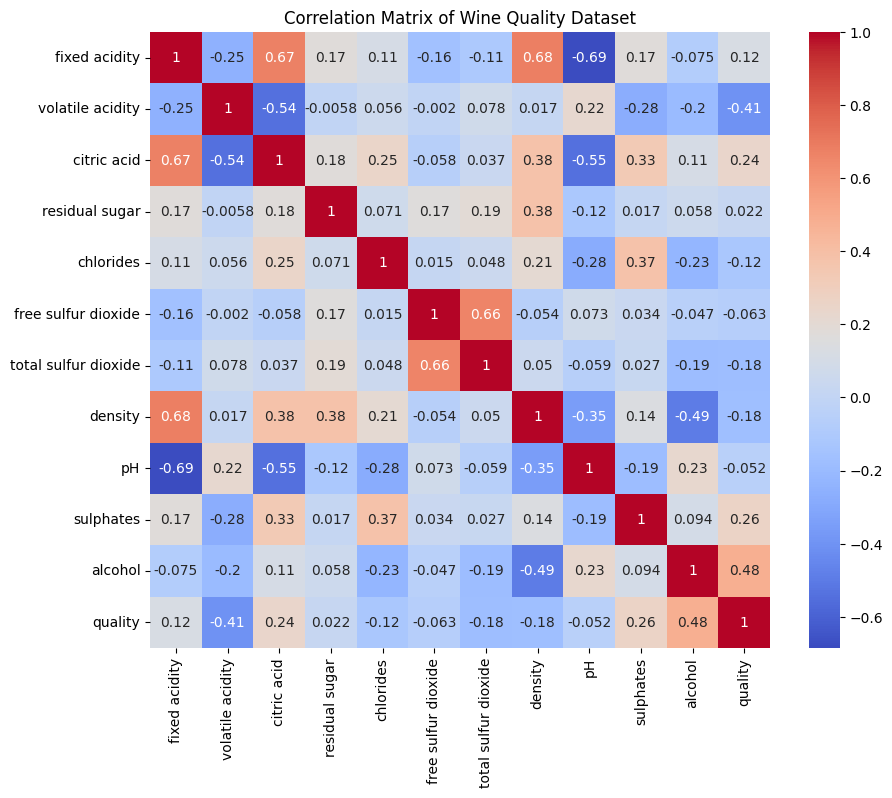

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Wine Quality Dataset")
plt.show()

### Q1.2.3
By looking at the plot from **Q1.2.2**, the feature with the strongest positive correlation with quality is alcohol (0.48), indicating that wines with higher alcohol content tend to have higher quality.
The feature with the strongest negative correlation with quality is volatile acidity (-0.41), meaning that higher volatile acidity is associated with lower wine quality.

### Q1.2.4
The correlation between pH and quality is -0.052. This indicates that there is almost no relationship between these two features, meaning that pH has very little effect on wine quality.

The correlation between alcohol and quality is 0.48, which is much higher than for pH. This suggests that wines with higher alcohol content tend to have better quality, making alcohol a better predictor of wine quality than pH.

---

## 1.3 Linear Regression

### Q1.3.1

In [8]:
from sklearn.linear_model import SGDRegressor

X = df[["chlorides"]]  # input feature
y = df[["quality"]]    # target label

# model for linear regression with gradient descent
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)

sgd_reg.fit(X, y) # train the model

# results:
print("Intercept:", sgd_reg.intercept_)
print("Coefficient:", sgd_reg.coef_)

Intercept: [5.62647607]
Coefficient: [0.40830322]


/home/shekhe9920/ml/my_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Q1.3.2

In [9]:
from sklearn.linear_model import LinearRegression

X = df[["alcohol"]]  # input feature
y = df[["quality"]]    # target label

# model for linear regression with gradient descent
lin_reg = LinearRegression()
lin_reg.fit(X, y) # train the model

# results:
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

Intercept: [1.88701286]
Coefficient: [[0.36104097]]


### Q1.3.3

Model using **chlorides**:
* Intercept: 5.62647607
* Coefficient: 0.40830322

The positive coefficient indicates that higher chloride levels are associated with slightly higher wine quality. But, this relationship is weak and may not be meaningful in practice.

Model using **alcohol**:
* Intercept: 1.88701286
* Coefficient: 0.36104097

The positive coefficient shows that wines with higher alcohol content tend to have higher quality.

Comparison:
The model using alcohol is a better predictor of wine quality because the relationship is stronger and more meaningful. While the correlation between chlorides and quality is slightly negative (-0.12), the regression model shows that chlorides are not a reliable predictor of wine quality.

### Q1.3.4

/home/shekhe9920/ml/my_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
/home/shekhe9920/ml/my_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


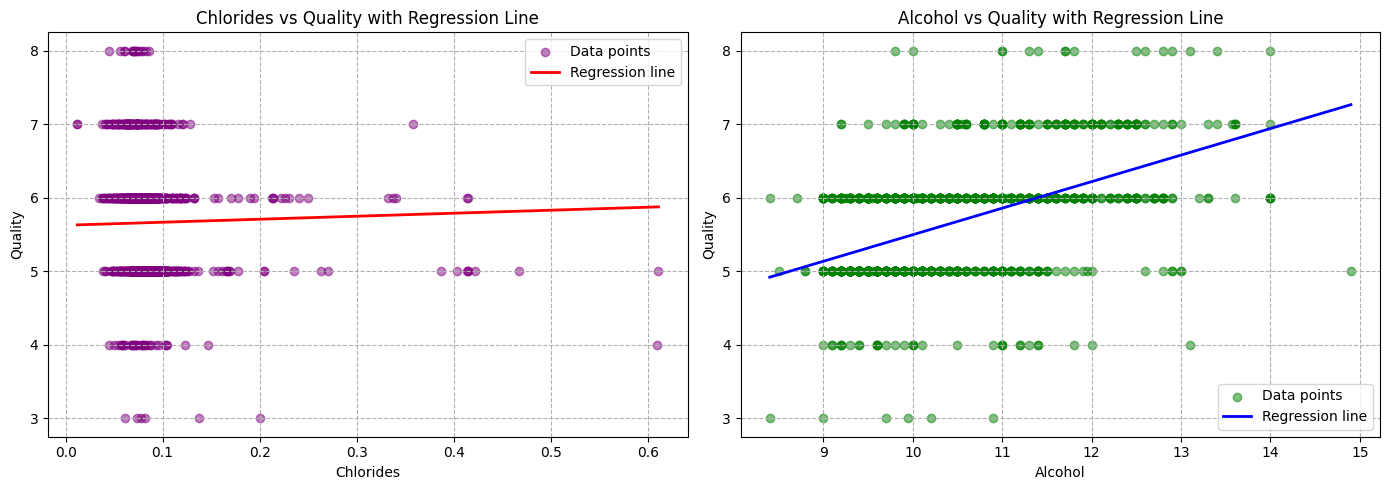

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# quality prediction based on chlorides: 
X_chlorides_sorted = np.sort(df["chlorides"].values).reshape(-1, 1)
y_chlorides_pred = sgd_reg.predict(X_chlorides_sorted)

# quality prediction based on alcohol:
X_alcohol_sorted = np.sort(df["alcohol"].values).reshape(-1, 1)
y_alcohol_pred = lin_reg.predict(X_alcohol_sorted)

plt.figure(figsize=(14,5)) 

# first plot: Chlorides vs Quality
plt.subplot(1, 2, 1)
plt.scatter(df["chlorides"], df["quality"], alpha=0.5, color="purple", label="Data points")
plt.plot(X_chlorides_sorted, y_chlorides_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.title("Chlorides vs Quality with Regression Line")
plt.grid(True, which='both', linestyle='--', alpha=1)
plt.legend()

# second plot: Alcohol vs Quality
plt.subplot(1, 2, 2)
plt.scatter(df["alcohol"], df["quality"], alpha=0.5, color="green", label="Data points")
plt.plot(X_alcohol_sorted, y_alcohol_pred, color="blue", linewidth=2, label="Regression line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol vs Quality with Regression Line")
plt.grid(True, which='both', linestyle='--', alpha=1)
plt.legend()


plt.tight_layout()
plt.show()


**Chlorides:** The line does not match the data well. The correlation between quality and chlorides is too weak, so the model gives almost the same prediction for all values of chlorides.

**Alcohol:** The line fits the data much better. It shows a clear upward trend: the higher the alcohol content, the better the quality. This agrees with the correlation of 0.48.

---

## 1.4 Train-Test Split

### Q1.4.1 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df[["alcohol"]] # using only olcohol to predict wine quality
y = df["quality"]

# standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

r2_alcohol_scores = [] 

# run 5 different splits
for i in range(5):
    print(f"Fold {i+1}")
    
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=i
    )
    
    # model (stochastic gradient descent)
    model = SGDRegressor(
        eta0=0.01,      # learning reate
        max_iter=1000,  # max tot iterations
        tol=1e-3,       # tolerance limit
        random_state=42 
    ) 
    model.fit(X_train, y_train)
    
    # prediction
    y_pred = model.predict(X_test)
    
    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    r2_alcohol_scores.append(r2)
    
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("-" * 30)

print(f"Average R^2 across 5 splits: {np.mean(r2_alcohol_scores):.4f}")

Fold 1
MSE: 0.4241, RMSE: 0.6513, R²: 0.3048
------------------------------
Fold 2
MSE: 0.4592, RMSE: 0.6777, R²: 0.2680
------------------------------
Fold 3
MSE: 0.4924, RMSE: 0.7017, R²: 0.2635
------------------------------
Fold 4
MSE: 0.5253, RMSE: 0.7248, R²: 0.2928
------------------------------
Fold 5
MSE: 0.4513, RMSE: 0.6718, R²: 0.2965
------------------------------
Average R^2 across 5 splits: 0.2851




By looking at the $R^2$ score (explained variance), we can see how well alcohol alone can predict wine quality. A higher $R^2$ score means the model has a better chance of predicting the quality.  
- **$R^2$ close to 1** $\rightarrow$ the model predicts very well.  
- **$R^2$ close to 0** $\rightarrow$ the model does not predict well.

From the results above, we got an $R^2$ score of about **0.285**. This means alcohol alone explains about **28.5% of the variation** in wine quality.  
This shows that alcohol has some relationship with wine quality, but it is **not enough on its own**. Wine quality also depends on many other factors.

--- 


### Q1.4.2

In [12]:
X = df[["chlorides"]] # using only chloride to predict wine quality
y = df["quality"]

# standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

r2_chlorides_scores = [] 

# run 5 different splits
for i in range(5):
    print(f"Fold {i+1}")
    
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=i
    )
    
    # model (stochastic gradient descent)
    model = SGDRegressor(
        eta0=0.01,      # learning reate
        max_iter=1000,  # max tot iterations
        tol=1e-3,       # tolerance limit
        random_state=42 
    ) 
    model.fit(X_train, y_train)
    
    # prediction
    y_pred = model.predict(X_test)
    
    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    r2_chlorides_scores.append(r2)
    
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("-" * 30)

print(f"Average R^2 across 5 splits: {np.mean(r2_chlorides_scores):.4f}")

Fold 1
MSE: 0.5918, RMSE: 0.7693, R²: 0.0299
------------------------------
Fold 2
MSE: 0.6297, RMSE: 0.7936, R²: -0.0038
------------------------------
Fold 3
MSE: 0.6620, RMSE: 0.8137, R²: 0.0098
------------------------------
Fold 4
MSE: 0.7264, RMSE: 0.8523, R²: 0.0220
------------------------------
Fold 5
MSE: 0.6394, RMSE: 0.7996, R²: 0.0034
------------------------------
Average R^2 across 5 splits: 0.0123



The R² score is much lower this time when we only use **chlorides** to predict wine quality. It is almost **0 (0.0123)**, which means that the model does not predict well. This shows that chlorides alone have almost **no relationship** with wine quality, and many other factors are needed to make good predictions.


### Q1.4.3

Yes, the model is underfitting in both cases mentioned in question Q1.4.1 and Q1.4.2. This is because using only **alcohol** or **chlorides** (especially chlorides) is not enough to make accurate predictions for wine quality. With so little information, the model becomes **too simple** and produces **unreasonable outputs**, since it cannot capture the true complexity of the data.



### Q1.4.4

In [13]:
mean_alcohol_r2 = np.mean(r2_alcohol_scores)
variance_alcohol_r2 = np.var(r2_alcohol_scores)

mean_chlorides_r2 = np.mean(r2_chlorides_scores)
variance_chlorides_r2 = np.var(r2_chlorides_scores)

print("Alcohol: ")
print(f"Mean R^2: {mean_alcohol_r2:.4f}")
print(f"Variance of R^2: {variance_alcohol_r2:.4f}")

print("Chloride: ")
print(f"Mean R^2: {mean_chlorides_r2:.4f}")
print(f"Variance of R^2: {variance_chlorides_r2:.4f}")

Alcohol: 
Mean R^2: 0.2851
Variance of R^2: 0.0003
Chloride: 
Mean R^2: 0.0123
Variance of R^2: 0.0001


The results show that **alcohol** has a much higher mean $R^2$ (0.2851) compared to **chlorides** (0.0123).  
This means alcohol alone explains about **28.5% of the variation** in wine quality, while chlorides explain almost nothing.

The variance for alcohol (0.0003) is slightly higher than for chlorides (0.0001), which shows that the performance with alcohol varies a little between folds, while chlorides consistently give very poor results.

In conclusion, alcohol is a much stronger predictor of wine quality than chlorides, but even alcohol alone is not enough to create an accurate model. Wine quality depends on multiple factors, not just one feature.

---

## 1.5 Multiple Linear Regression

### Q1.5.1

In [14]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("quality", axis=1)
y = df["quality"]

# standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

r2_scores = [] # list to store the R^2 scores

# run 5 different splits
for i in range(5):
    print(f"Fold {i+1}")
    
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=i
    )
    
    # model (stochastic gradient descent)
    model = SGDRegressor(
        eta0=0.01,      # learning reate
        max_iter=1000,  # max tot iterations
        tol=1e-3,       # tolerance limit
        random_state=42 
    ) 
    model.fit(X_train, y_train)
    
    # prediction
    y_pred = model.predict(X_test)
    
    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2) 
    
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("-" * 30)


Fold 1
MSE: 0.3574, RMSE: 0.5979, R²: 0.4141
------------------------------
Fold 2
MSE: 0.3646, RMSE: 0.6038, R²: 0.4188
------------------------------
Fold 3
MSE: 0.4138, RMSE: 0.6433, R²: 0.3811
------------------------------
Fold 4
MSE: 0.4450, RMSE: 0.6671, R²: 0.4009
------------------------------
Fold 5
MSE: 0.3911, RMSE: 0.6254, R²: 0.3903
------------------------------


### Q1.5.2 
From the output results of question Q1.5.1, we can see that the model performs better in each fold compared to the models that only used **alcohol** or **chlorides** as a single feature to predict wine quality.  
The **R² score** is much higher, which indicates a more accurate prediction of wine quality.  
We can also see that the **MSE** and **RMSE** values are lower, which is a good sign since it means the model is making fewer errors in its predictions.

Here is the calculation of the mean and variance of the R² score for the multiple linear regression model:

In [15]:
mean_r2 = np.mean(r2_scores)
variance_r2 = np.var(r2_scores)

print(f"Mean R^2: {mean_r2:.4f}")
print(f"Variance of R²: {variance_r2:.4f}")

Mean R^2: 0.4011
Variance of R²: 0.0002


As we can see, the mean $R^2$ score is much higher than both models from question Q1.4.4. The variance of the $R^2$ score is between the variance of the models using alcohol and chlorides, showing that this model is more stable. By looking at both the mean and variance, we can conclude that this multiple linear regression model is much more stable and much better at predicting wine quality than using just one feature.

### Q1.5.3

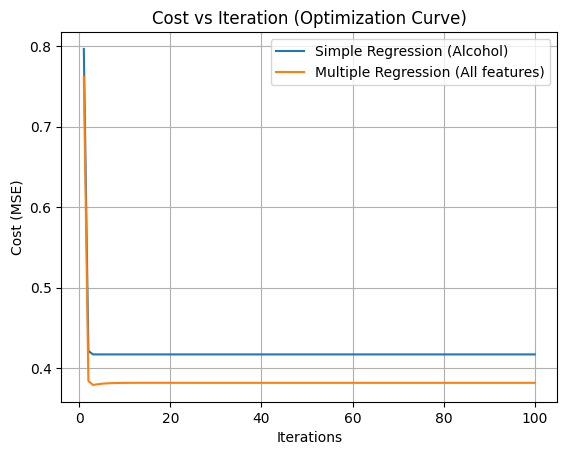

In [16]:
# simple regression (only alcohol)
X_simple = df[["alcohol"]]
y = df["quality"]

# multiple regression (all features)
X_multiple = df.drop("quality", axis=1)

# standardize both
scaler = StandardScaler()
X_simple_scaled = scaler.fit_transform(X_simple)
X_multiple_scaled = scaler.fit_transform(X_multiple)

# split data (80/20)
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple_scaled, y, test_size=0.2, random_state=42
)
X_train_multiple, X_test_multiple, _, _ = train_test_split(
    X_multiple_scaled, y, test_size=0.2, random_state=42
)

# TRAINING LOOP
def train_and_log_cost(X_train, y_train, X_test, y_test, max_iter=100):
    model = SGDRegressor(eta0=0.01, max_iter=1, tol=None, random_state=42, warm_start=True)
    costs = []

    for i in range(max_iter):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        costs.append(mse)
    return costs

# train both models
simple_costs = train_and_log_cost(X_train_simple, y_train, X_test_simple, y_test, max_iter=100)
multiple_costs = train_and_log_cost(X_train_multiple, y_train, X_test_multiple, y_test, max_iter=100)

# plot cost vs. iteration
plt.plot(range(1, 101), simple_costs, label="Simple Regression (Alcohol)")
plt.plot(range(1, 101), multiple_costs, label="Multiple Regression (All features)")

plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs Iteration (Optimization Curve)")
plt.legend()
plt.grid(True)
plt.show()

### Q1.5.4 

The *multiple linear regression* performs better.

*Why:*
- It achieves a higher $R^2$ ($\approx 0.40$) than the simple models  
  – Alcohol only: $R^2 \approx 0.29$  
  – Chlorides only: $R^2 \approx 0.01$ $\rightarrow$ Higher $R^2$ means it explains more variation in wine quality.
- It has lower MSE/RMSE (smaller prediction errors).
- In the **Cost vs Iteration** plot, it converges to a lower final cost, showing a better fit.
- Its variance across folds is low, indicating stable performance.

Since wine quality depends on multiple variables, using all features provides a more accurate and stable model than using a single feature.


---

----
# Exercise-2

### Q2.1

                 Feature  Importance
10               alcohol    0.282929
9              sulphates    0.134164
1       volatile acidity    0.133508
6   total sulfur dioxide    0.070300
8                     pH    0.059995
4              chlorides    0.058002
0          fixed acidity    0.057861
2            citric acid    0.054573
7                density    0.051610
3         residual sugar    0.049845
5    free sulfur dioxide    0.047214


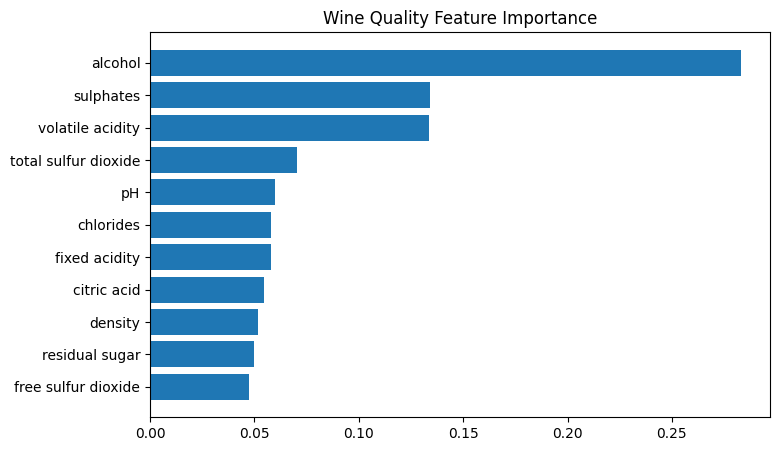

In [17]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = df.drop(columns=['quality'])  # features only
y = df['quality']                 # target variable

# train model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# calculate feature importance
importance = model.feature_importances_

# sorted table
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()  # most important at the top
plt.title("Wine Quality Feature Importance")
plt.show()

As we can see from the plot above, **alcohol** is the most influential feature in predicting wine quality. This is a reasonable result because, in Q1.2.2, we observed that alcohol had the highest correlation with quality among all the features.

### Q2.2 

#### a.) Polynomial regression: 

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.pipeline import Pipeline

results = []

for degree in range(1, 5):
    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # pipeline for polynomial regression
    poly_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree = degree)),
        ('linear_regression', LinearRegression())
    ])

    # train the model
    poly_model.fit(X_train, y_train)

    # predictions
    y_pred = poly_model.predict(X_test)         # for test performance
    y_train_pred = poly_model.predict(X_train)  # for train performance (to check overfitting/underfitting)

    # evaluation metrics
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    r2 = r2_score(y_test, y_pred)

    # store results
    results.append({
        'Degree': degree,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'R^2 (Test)': r2
    })

results_df = pd.DataFrame(results)
print(results_df)


   Degree  Train RMSE  Test RMSE    R^2 (Test)
0       1    0.644291   0.616468      0.317069
1       2    0.602874   0.632594      0.280872
2       3    0.441140   1.927599     -5.677121
3       4    0.045866  90.644456 -14764.168534


**Degree 1 $\rightarrow$ Degree 2**  
- **Test RMSE** increased slightly \(0.6165 $\rightarrow$ 0.633\) $\rightarrow$ performance **worsened**, not improved.  
- **$R^2$** decreased (0.31707 $\rightarrow$ 0.281) $\rightarrow$ the model **explained less variance** in wine quality.

*Conclusion:* Adding quadratic terms did **not improve performance**. It slightly **worsened generalization**.



**Degrees 3 and 4**  
- **Train RMSE** dropped massively, reaching almost **0** at degree 4 $\rightarrow$ the model **memorized the training set**.  
- **Test RMSE** skyrocketed (up to **90+**) and **$R^2$** became extremely negative $\rightarrow$ **overfitting**.

*Conclusion:* Higher polynomial degrees **overfit** the data, making the model **unusable for unseen data**.


#### b.) Regularization: 

In [19]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# helper function to train, evaluate and return results
def evaluate_model(model, model_name, alpha, X_train, X_test, y_train, y_test):
    """Trains the given model and returns a dictionary with evaluation metrics."""
    model.fit(X_train, y_train)

    # predictions
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # metrics
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2 = r2_score(y_test, y_pred_test)

    return {
        'Model': model_name,
        'Alpha': alpha,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'R^2 (Test)': r2
    }

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# run both models in a loop
models = [
    # Ridge alphas
    (Ridge(alpha=0.0001), "Ridge"),
    (Ridge(alpha=0.001), "Ridge"),
    (Ridge(alpha=0.01), "Ridge"),
    (Ridge(alpha=0.1), "Ridge"),
    (Ridge(alpha=1), "Ridge"),
    
    # Lasso alphas
    (Lasso(alpha=0.0001), "Lasso"),
    (Lasso(alpha=0.001), "Lasso"),
    (Lasso(alpha=0.01), "Lasso"),
    (Lasso(alpha=0.1), "Lasso"),
    (Lasso(alpha=1), "Lasso"),
]

results = [
    evaluate_model(model, name, model.alpha, X_train, X_test, y_train, y_test)
    for model, name in models
]  

# DataFrame for results
results_df = pd.DataFrame(results)
print(results_df)

# coefficient analysis
ridge_best = Ridge(alpha=0.05).fit(X_train, y_train)
lasso_best = Lasso(alpha=0.05).fit(X_train, y_train)

# DataFrame comparing coefficients
coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Ridge (alpha=0.05)': ridge_best.coef_,
    'Lasso (alpha=0.05)': lasso_best.coef_
})


coef_comparison = coef_comparison.sort_values(by="Ridge (alpha=0.05)", ascending=False)
print("\nCoefficient comparison (Ridge vs Lasso):")
print(coef_comparison)

   Model   Alpha  Train RMSE  Test RMSE  R^2 (Test)
0  Ridge  0.0001    0.644302   0.616150    0.317774
1  Ridge  0.0010    0.644466   0.615400    0.319433
2  Ridge  0.0100    0.644640   0.615050    0.320206
3  Ridge  0.1000    0.644691   0.614499    0.321424
4  Ridge  1.0000    0.645511   0.611074    0.328968
5  Lasso  0.0001    0.644682   0.614584    0.321236
6  Lasso  0.0010    0.645466   0.611158    0.328782
7  Lasso  0.0100    0.655957   0.603731    0.344998
8  Lasso  0.1000    0.714413   0.633782    0.278168
9  Lasso  1.0000    0.807366   0.729726    0.043079

Coefficient comparison (Ridge vs Lasso):
                 Feature  Ridge (alpha=0.05)  Lasso (alpha=0.05)
9              sulphates            0.919276            0.000000
10               alcohol            0.296000            0.315921
0          fixed acidity            0.023085            0.047236
5    free sulfur dioxide            0.002125            0.005235
6   total sulfur dioxide           -0.002348           -0.003

**1. Generalization (Train/Test RMSE and \(R^2\)):**

  **Ridge:**  
- As alpha increases, the Test RMSE slowly goes down (from 0.616 $\rightarrow$ 0.611), and $R^2$ goes up (from 0.318 $\rightarrow$ 0.329).  
- This means Ridge **reduces overfitting** and improves how well the model works on new data.  
- Ridge never gets much worse, even at higher alpha values.

**Lasso:**  
- At low alpha (0.0001 $\rightarrow$ 0.01), Lasso **improves** Test RMSE and $R^2$, reaching its best $R^2 = 0.345$.  
- When alpha gets too high (0.1 $\rightarrow$ 1.0), performance **drops a lot**. Test RMSE increases, and $R^2$ goes close to **0**.  
- This happens because Lasso becomes too strict and **removes too many features**, causing underfitting.




**2. Coefficients:**
**Ridge:**  
- Shrinks all coefficients smoothly but keeps them non-zero.  
- *Example:* even small features like "free sulfur dioxide" still have a small effect.

**Lasso:**  
- Forces many coefficients to exactly zero, leaving only the most important features like alcohol.  
- *Example:* sulphates, citric acid, density, and others are completely removed (set to 0).


#### c.) Model comparison: 

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # number of trees
    'max_depth': [None, 5, 10, 20],       # tree depth
    'min_samples_split': [2, 5, 10],      # min samples to split a node
    'min_samples_leaf': [1, 2, 4]         # min samples at a leaf
}

# initialize model and grid search
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=forest_reg,
    param_grid=param_grid,
    cv=5,                       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # minimize MSE
    return_train_score=True,
    n_jobs=-1                   # use all CPU cores
)

# fit grid search
grid_search.fit(X_train, y_train)

# print the best parameters found
print("Best parameters for Random Forest:", grid_search.best_params_)

# get the best model
best_model = grid_search.best_estimator_


# make predictions
y_pred_f = best_model.predict(X_test)        # Test predictions
y_train_pred_f = best_model.predict(X_train) # Training predictions

 
# evaluation metrics
test_rmse_f = np.sqrt(mean_squared_error(y_test, y_pred_f))
train_rmse_f = np.sqrt(mean_squared_error(y_train, y_train_pred_f))
r2_f = r2_score(y_test, y_pred_f)


# store results
results_f = [{
    'Model': 'Random Forest',
    'Train RMSE': train_rmse_f,
    'Test RMSE': test_rmse_f,
    'R^2 (Test)': r2_f
}]

results_df_f = pd.DataFrame(results_f)
print("\nRandom Forest Performance:")
print(results_df_f)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Performance:
           Model  Train RMSE  Test RMSE  R^2 (Test)
0  Random Forest    0.226678   0.548983    0.458405



### **Model Comparison**

**Linear Regression:**
- $R^2 \approx 0.40$
- Test $RMSE \approx 0.61$ 
- Assumes a straight-line relationship between the features and wine quality.

**Random Forest:**
- $R^2 \approx 0.46$ 
- Test $RMSE \approx 0.55$ 
- Can capture complex patterns and interactions between features.



### **Which performs better and why?**
The **Random Forest** model performs **better** because:  
- It has **lower Test RMSE** and **higher $R^2$** $\rightarrow$ more accurate predictions.  
- It does **not assume a linear relationship**, so it can model more complex patterns in the data.  
- By combining many decision trees, it becomes **more robust** and handles noise better.



*Conclusion:* Random Forest is a better choice for this dataset because wine quality depends on many factors that interact in non-linear ways.

